# Introduction to PyTorch

This notebook was adapted from [Stanford's CS224N Pytorch](https://github.com/SunnyHaze/Stanford-CS224N-NLP/blob/main/CS224N%20PyTorch%20Tutorial.ipynb) Tutorial by Dilara Soylu as well as the official [PyTorch 60 Minute Blitz Tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) demo for PyTorch.

We will have a basic introduction to `PyTorch` and Tensors and how to use them to create, train and evaluate Neural Networks. For that, we will also get acquainted with `torch.autograd` and the concept of a computational graph. In the end, we will build, train, and evaluate our first classifier by classifying two moons!

## Introduction
[PyTorch](https://pytorch.org/) is a machine learning framework that is used in both academia and industry for various applications. PyTorch started of as a more flexible alternative to [TensorFlow](https://www.tensorflow.org/), which is another popular machine learning framework. At the time of its release, `PyTorch` appealed to the users due to its user friendly nature: as opposed to defining static graphs before performing an operation as in `TensorFlow`, `PyTorch` allowed users to define their operations as they go, which is also the approached integrated by `TensorFlow` in its following releases. Although `TensorFlow` is more widely preferred in the industry, `PyTorch` is often times the preferred machine learning framework for researchers.

Now that we have learned enough about the background of `PyTorch`, let's start by importing it into our notebook.

In [177]:
import torch
import torch.nn as nn # contains functionality for building neural networks
import numpy as np

Like in the last notebook, we can use `__version__` to check the `PyTorch` version that Colab is running on.

In [178]:
torch.__version__

'2.6.0+cu124'

PyTorch is open source and the documentation can he accessed [here](https://pytorch.org/docs/stable/index.html). With it imported, we can get started!

## Tensors

Tensors are the most basic building blocks in `PyTorch`. Tensors are similar to matrices, but the have extra properties and they can represent higher dimensions. For example, an square RGB image with 256 pixels in both sides can be represented by a 3x256x256 tensor, where the first 3 dimensions represent the color channels RGB. In `PyTorch`, we often use tensors to encode the inputs and outputs of a neural network model, as well as the model's parameters, to a numeric format which can be understood by the architecture. Tensors can run on GPU's to accelerate e.g. network training.

### Tensor Initialization

There are several ways to instantiate tensors:

**Directly from data**

Tensors can be created directly from data. The data type is
automatically inferred.

In [179]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [180]:
print(type(x_data)) # prints the type of the data structure, i.e. tensor
print(x_data.dtype) # print type of elements in the tensor

<class 'torch.Tensor'>
torch.int64


We can also speficy the data type (`dtype`) directly:

In [181]:
# We are using the dtype to create a float tensor
x_float = torch.tensor(data, dtype=torch.float)
x_float.dtype

torch.float32

**From a Python List**

We can initalize a tensor from a Python list, which could include sublists. The dimensions and the data types will be automatically inferred by PyTorch when we use torch.tensor().

In [182]:
# Initialize a tensor from a Python List
data = [
        [0, 1],
        [2, 3],
        [4, 5]
       ]
x_python = torch.tensor(data)

# Print the tensor
x_python

tensor([[0, 1],
        [2, 3],
        [4, 5]])

**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa).

In [183]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[0, 1],
        [2, 3],
        [4, 5]])

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument
tensor, unless explicitly overridden.

In [184]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6373, 0.8637],
        [0.5954, 0.0383]]) 



**With random or constant values:**

Similar to what we have seen with NumPy, we can pre-fill tensors with static values like 1, or random numbers, just such that we have the shape as a placeholder. For this, we define `shape` as a tuple of tensor dimensions. In the functions below, it
determines the dimensionality of the output tensor.

In [185]:
shape = (2, 3,) # 2x3x1 = 2x3 tensor
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

# to read the dimensions of a tensor, use shape or size()
print(zeros_tensor.shape)
print(zeros_tensor.size())

Random Tensor: 
 tensor([[0.7632, 0.1682, 0.4184],
        [0.9760, 0.2143, 0.0783]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
torch.Size([2, 3])
torch.Size([2, 3])


### Tensor Attributes

Tensors have several attributes which are important to know and adjust to your needs. Some of these properties are the aforementioned `shape` (aka dimensions), `dtype` (data type of the elements in the tensor) and the `device` they are stored on. The device could for instance be a CPU or a GPU. During training of neural networks, we might want to push our tensors onto the GPU device for accelerated training. Let's look at these tensor attributes below:

In [186]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


We can also index separate dimensions of our tensor. Here, we have a 2D tensor with 3 rows X 4 columns.

In [187]:
print(tensor.shape[0]) # access the row dimension (is only considered the row dimension in 2D)
print(tensor.size(0)) # another way to access the row dimension

3
3


### Tensor Operations

Over 100 tensor operations, including transposing, indexing, slicing,
mathematical operations, linear algebra, random sampling, and more are
comprehensively described
[here](https://pytorch.org/docs/stable/torch.html), where each of them can be run on the CPU and on the GPU.

**Standard numpy-like indexing and slicing:**

We index the rows of a 2D tensor by writing the row index into the parentheses. For indexing multiple dimensions, we use `:` and separate them by a comma.

In [188]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0 # set second col to 0 (remember 0-indexing in Python)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [189]:
tensor[0] # access 0th element of the tensor, which for a 2D tensor is the first row

tensor([1., 0., 1., 1.])

The indexing operations can become more sophisticated:

In [190]:
# get the top left element (the 0's in our indexing example) of each element (colon : runs through all elements) in our tensor
x = torch.Tensor([
                  [[1, 2], [3, 4]],
                  [[5, 6], [7, 8]],
                  [[9, 10], [11, 12]]
                 ])
x[:, 0, 0]

tensor([1., 5., 9.])

**Count and access tensor elements**

Use `numel()` to count the elements in a tensor.

In [191]:
i = torch.tensor([1, 2])
i.numel()

2

Use `item()` to access a tensor's underlying elements. This works on flattened or single dimensions of a tensor:

In [192]:
i[0].item()

1

**Joining tensors**

You can use `torch.cat` to concatenate a sequence of
tensors along a given dimension. See also
[torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html),
another tensor joining op that is subtly different from `torch.cat`.

In [193]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


**Reshaping tensors**

We can change the shape of a tensor with `view()` by simply specifying our desired shape:

In [194]:
# x_view shares the same memory as x, so changing one changes the other
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
print(x) # before reshaping, shape = (3,2)
x_view = x.view(2, 3)
print(x_view) # after reshaping, shape = (2,3)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


We can also just specify some of the dimensions and leave it up to Pytorch to infer the rest of them. Say we know that we want to have 3 rows, and we don't care how the rest of the tensor is structured, then we specify all dimensions we don't care about with `-1`:

In [195]:
x_view = x.view(3, -1)
x_view

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

We can remove singular dimensions with the `squeeze()` function.

In [196]:
x = torch.arange(10).reshape(5, 1, 2) # arange creates a list of 0-9 numbers, reshape shapes them into a tensor of dims (5,2)
x

tensor([[[0, 1]],

        [[2, 3]],

        [[4, 5]],

        [[6, 7]],

        [[8, 9]]])

In [197]:
x = x.squeeze() # removes the extra empty dimension, unsqueeze would add it back
x

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

**Multiplying tensors**

Similar to Numpy matrices, we have different ways to multiply Tensors:

In [198]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


**In-place operations**

In-place operations are operations that modify the datastructure directly, without having to re-assess it.
Operations that have a `_` suffix are in-place.
For example: `x.add_(y)` will directly add `y` to `x` without needing to call `x = x.add(y)`. However, their use is discouraged when computing derivates (important later when traiing models) due to the loss of the history.

In [199]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


**From Tensors to NumPy**

Just as we can go from Numpy arrays to tensors, we can also convert them back.

In [200]:
t = torch.ones(5)
print(f"Tensor: {t}")
n = t.numpy()
print(f"Numpy: {n}")

Tensor: tensor([1., 1., 1., 1., 1.])
Numpy: [1. 1. 1. 1. 1.]


A change in the tensor reflects a change in the NumPy array:

In [201]:
t.add_(1)
print(f"Tensor: {t}")
print(f"Numpy: {n}")

Tensor: tensor([2., 2., 2., 2., 2.])
Numpy: [2. 2. 2. 2. 2.]


### torch.autograd and the Computational Graph

**A word on training Neural Networks**

A neural network often follows the structure of having an input layer (where parts of our input data is collected), multiple model layers (hidden layers, if $\geq$ 2 then it is a deep neural network), and an output layer, which tells us the model prediction. The layers are defined by functions, which contain paremeters (weights and biases). Generally, the training procedure of neural networks follows a two-step approach:

*   **Forward Pass:** During the forward pass or forward propagation, the model runs the input data through the consecutive hidden layers and learns a representation of the input.It makes a best guess about the correct output from what it has learned.

*   **Backward Pass**: During the backward pass, traverses backwards through the architecture starting at the output layer. First, the error (how far the model prediction was off from the true output) is computed. That is propagated backwards through the model, collecting the derivatives of the error with respect to the parameters of the layer. These are called the model gradients. The gradients are used to adjust the parameters such that the next forward pass hopefully goes a bit better. Once the backward pass is done, another forward pass is started, until a certain stop criterion. For a more detailed, mathematical walkthrough
of backprop, check out this [video from
3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8).

`torch.autograd` is PyTorch's automatic differentiation feature that is used for the backward pass of neural networks. Automatic differentiation here means that given a consecutive set of functions (like the layers of a neural network), the differentiation engine figures out automatically how to compute the gradients. In PyTorch, this is done by calling the `backward()` method. Let's look at an example. Let\'s assume `a` and `b` to be parameters of an NN, and `Q` to be a layer.




In [240]:
# we create example "model inputs" a and b
# requires_grad parameter tells PyTorch to store gradients
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
a,b

(tensor([2., 3.], requires_grad=True), tensor([6., 4.], requires_grad=True))

In [241]:
# next, we define a function (can be imagined as the first hidden layer of a network) that is dependent on our input
Q = 3*a**3 - b**2
Q

tensor([-12.,  65.], grad_fn=<SubBackward0>)

Fisrtly, since `Q` was created as a result of `a` and `b`, or in other words is dependent on `a` and `b`, `autograd` attached a `grad_fn` to the `Q` tensor. It specifies that `Q` was created from `a` and `b` through subtraction, thus it has the `SubBackward` function attached as `grad_fn`. Since `Q` has a `grad_fn`, we can now use `autograd` and automatically calculate the derivative by calling `backward`. Afterwards, the gradients are deposited in `Q.grad`. I.e. we want to calculate:

$$\frac{\partial Q}{\partial a} = 9a^2 → [36, 81]$$

Since $9a^2 = 9 * [2, 3]^2 = 9* [4, 9]$

$$\frac{\partial Q}{\partial b} = -2b → [-12, -8]$$

We need to explicitly pass a `gradient` argument in `Q.backward()`
because it is a vector. `gradient` is a tensor of the same shape as `Q`,
and it represents the gradient of Q w.r.t. itself, i.e.

$$\frac{dQ}{dQ} = 1$$

In [242]:
Q.backward(torch.tensor([1., 1.])) # # first derivatives of Q wrt. a,b
print(a.grad)
print(b.grad)

tensor([36., 81.])
tensor([-12.,  -8.])


### Excursion: The Computational Graph in PyTorch

`autograd` keeps a record of all tensors and all
functions (layers) (along with the resulting new tensors) in a directed acyclic
graph (DAG) consisting of
[Function](https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
objects. In this graph, leaves are the input tensors, roots are the output
tensors. By tracing this graph from roots to leaves, you can
automatically compute the gradients using the chain rule from calculus.

In a forward pass, autograd does two things simultaneously:

-   run the requested operation to compute a resulting tensor, and
-   maintain the operation's `grad_fn` in the DAG.

The backward pass kicks off when `.backward()` is called on the DAG
root. `autograd` then:

-   computes the gradients from each `grad_fn`,
-   accumulates them in the respective tensor's `grad` attribute, and
-   using the chain rule, propagates all the way to the leaf tensors.

Below is a visual representation of the DAG of our example. We have two inputs, `a` and `b` of shape (2). `a` is raised to the power and then multiplied, thus this is reflected in the `PowBackward` and `MulBackward` `grad_fn`'s. In the
graph, the arrows are in the direction of the forward pass. The nodes
represent the backward functions of each operation in the forward pass.

![](https://pytorch.org/tutorials/_static/img/dag_autograd.png)

`torch.autograd` tracks operations on all tensors which have their
`requires_grad` flag set to `True`. For tensors that don't require
gradients, setting this attribute to `False` excludes it from the
gradient computation DAG. Such parameters in neural network training are usually termed frozen parameters (as they are not anymore updated). To save time, it is useful to freeze parts of your model that you won't need to compute gradients for.


## Neural Networks

So far we have looked into `numpy`, `tensors` and `PyTorch` functionalities, as well as how `autograd`, and the forward/backward passes work. We now have some solid basics for diving into the creation, training and evaluation of Neural Networks. To understand the basics, we will first work with a very simple simple dataset `make_moons` from the `scikit-learn` library. This dataset generates two interleaving half circles, and your task will be to classify each point as being part of the correct half-circle.

**A typical training/evaluation procedure for a neural network is as follows:**

*   Obtain/download your dataset
*   Split it into train-val-test splits (here, we only consider train and test splits since we do not focus on hyperparameters)
*   Package your splits into `Dataloader`s for easier iteration and batching of the data
*   Define a neural network architecture, here we define `SimpleClf`, a binary classifier
*   Iterate over the dataset, passing each batch through the model (forward pass) and get their prediction (here, class labels of either 0 or 1)
*   Calculate the loss (how far the model prediction is away from the true output)
*   Calculate and propagate gradients backwards through the network (backward pass)
*   Update the weights of the network through an update rule (not detailed here)
* Repeat until a certain criterion/state is met (here, we repeat for a certain number of epochs)
*   Evaluate your model on certain metrics

As for each machine learning task, we first import the necessary libraries. We import the `make_moons` toy dataset along with `matplotlib`, a library for creating visualizations and plots in Python. Moreover, we import functionalities needed for neural network traiing with `PyTorch`.


In [283]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm # for visualizing the training progress
from torch.utils.data import DataLoader, TensorDataset

### A word on GPU's and `device`

For now, we will not go much into detail about how to optimize for training on the GPU, but just that it is easily possible with `PyTorch`. In Google Colab, simply navigate to your task bar at the top and select Edit > Notebook Settings. Then choose one of the available free GPU's and re-connect your notebook. Then, the below cell should print `cuda:0`, which indicates that you will be training your model on the GPU nr. 0. If you do not connect to a GPU, colab will automatically train your model on the cpu.

It is useful to keep a `device` variable, as you can assign this to your tensors later on, specifying which one should be put onto your GPU.

In [285]:
# check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device: ', device)

Device:  cpu


### Step 1 - Obtaining the dataset

Next, we generate some data points by specifying the number of points we want to be in our dataset (aka the dataset size), as well as the class labels. In our case, it will be binary classification, as data points can only be part of either the first half-moon (label=0) or the second half-moon (label=1). We also specify a `random_state`, which is a seed that will always lead to the same dataset being produced. In general, think about setting seeds in your machine learning projects when you need your results to be reproducible.

In [261]:
# specify number of datapoints and their spread, feel free to play around with these parameters
n_points = 500
noise = 0.18
seed = 42

# x = 500 randomly spread datapoints with 2D coordinates -> (n_points, 2)
# y = 500 labels (either 0 or 1 for each point) -> (n_points,)
x, y = make_moons(n_samples=n_points, noise=noise, random_state=seed)

In [262]:
x.shape # first col has x-coordinates, second col has y-coordinates (not to be confused with x=data and y=labels)

(500, 2)

Let's use the `matplotlib` library to visualize our dataset:

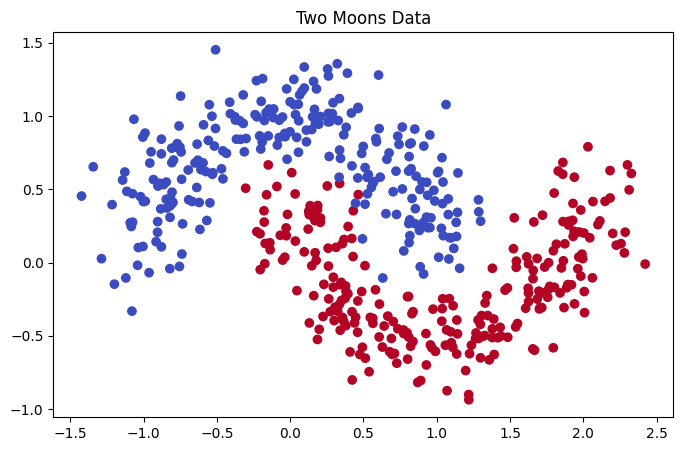

In [265]:
plt.figure(figsize=(8,5))
plt.scatter(x[:,0], x[:,1], c=y, cmap='coolwarm')
plt.title('Two Moons Data')
plt.show()

Here, we created a simple dataset ourselves, however oftentimes, the dataset will be downloaded. The dataset can contain anything from images, EEG waves, text etc. In further notebooks, we will work with external datasets, which have to be downloaded and often properly pre-processed first before they can be passed to a model.

### Step 2 - Splitting our dataset

In Machine Learning, we split our dataset in the following manner:

*   **Training set/split:** Portion of data used to train the model and which the parameters are being optimized on
*   **Validatio set/split:** Portion of data used for optimizing a model's hyperparameters (we will talk about what hyperparameters are later on)
*   **Test set/split:** Portion of data used to test the final model. This data is not part of the training set, thus it constitutes "unseen" and novel data from the model's perspective. It is used for us to see how well the model generalizes

The majority of the dataset should go towards training. Mostly, splits are done in a 70-10-20 or 80-10-10 fashion, where e.g. 70% of the data consitutes the training set. `scikit-learn` offers an out-of-the-box functionality for the splitting of data. Since we are only training a very simple model today to teach you the basics, we will not be needing a validation split, and only work with training and test datasets.



In [268]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed) # 20% will be test set, 80% training set

Let's visualize our training split:

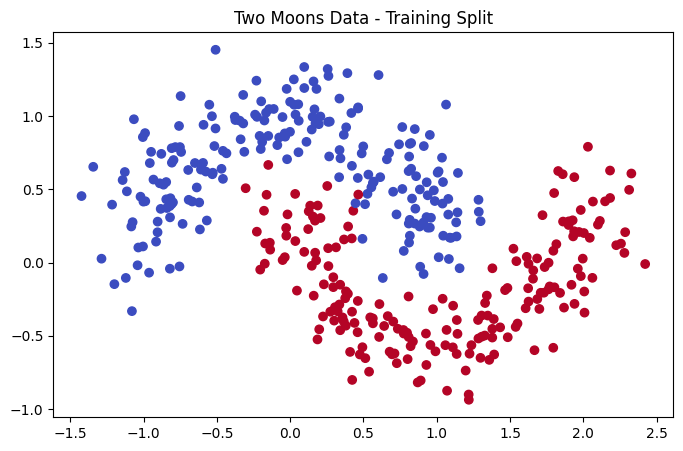

In [269]:
plt.figure(figsize=(8,5))
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='coolwarm')
plt.title('Two Moons Data - Training Split')
plt.show()

### Step 3 - Dataloaders





In [290]:
BATCH_SIZE = 32 # feel free to play around with the batch size parameter

# create tensors out of your input data and set the device accordingly (the tensors will reside on the cpu or gpu)
x_train_tensor, y_train_tensor = torch.tensor(x_train), torch.tensor(y_train)
x_test_tensor, y_test_tensor = torch.tensor(x_test), torch.tensor(y_test)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

### Step 4 - Define a simple binary classifier

We will now create a simple binary classification pipeline using `PyTorch` and `scikit-learn` and explain important training loop components along the way. The model will be trained using the above visualized training split, and finally evaluated on the test set.

As seen in our first tutorial, neural networks in Python are defined as classes with at least an `__init__` constructor and a `forward` method. `__init__` is called each time we instantiate a new `SimpleClf`, which will be our simple binary classifier that predicts the class of each data point from our Two Moons dataset. We have to specify the dimensions of each layer, as well as what the forward pass should look like. Here is an example of what a simple network architecture for our problem can look like:

In [291]:
class SimpleClf(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(SimpleClf, self).__init__() # initializes base class nn.Module

    self.fc1 = nn.Linear(in_features=input_dim, out_features=hidden_dim) # input layer
    self.fc2 = nn.Linear(in_features=hidden_dim, out_features=hidden_dim) # hidden layer 1
    self.fc3 = nn.Linear(in_features=hidden_dim, out_features=hidden_dim) # hidden layer 2
    self.fc4 = nn.Linear(in_features=hidden_dim, out_features=output_dim) # output layer

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.sigmoid(self.fc4(x))
    return x

model = SimpleClf(input_dim=2, hidden_dim=3, output_dim=1)
print(model)

SimpleClf(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
  (fc4): Linear(in_features=3, out_features=1, bias=True)
)


You can easily expect your model size, i.e. the number of parameters:

In [292]:
print(sum(p.numel() for p in model.parameters()))

37


In [ ]:
# define some training setting parameters
lr = 1e-3
n_epochs = 50

criterion = nn.BCELoss()
optim = optim.Adam(model.parameters(), lr=lr)

for epoch in tqdm(range(n_epochs), desc='Training on two moons...'):
  #TRAIN PART
  model.train() # put model into training mode, i.e. dropout, batchnorm, gradient calculation etc. is active
  epoch_loss = [] # keep track of your epoch loss which you want to print at the end

  for x, y in train_loader:
    x, y = x.to(device), y.to(device) # place tensors on the correct device for training

    optim.zero_grad() # reset gradients from previous iteration such that they do not sum up

    pred = model(x)
    loss = criterion(pred, y) # calculate the loss of the training sample
    loss.backward() # calculate gradients wrt to model parameters

    optim.step() # update model parameters

    epoch_loss.append(loss.item()) # add batch loss to epoch loss

  # print loss over all samples for the current epoch
  print(f'Epoch {epoch}, Loss: {epoch_loss[-1]}')


  #EVAL PART
  model.eval() # set model to evaluation mode, i.e. certain parts will be inactivate
  with torch.no_grad():
    preds_all, y_all = [], []
    for x_t, y_t in test_loader:
      x_t.to(device)
      pred_t = model(x_t)
      pred_t = (pred_t > 0.5).float().cpu() # boolean mask converted to class labels

      preds_all.append(pred_t)
      y_all.append(y_t) # append the true labels of the current batch

    y_pred = torch.cat(preds_all)
    y_true = torch.cat(labels_all)
    acc = accuracy_score(y_true, y_pred)

  print(f'Epoch {epoch}, Test Accuracy: {acc:.4f}')
